In [103]:
import csv, datetime, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from functools import reduce
sns.set_style("darkgrid")

In [24]:
data_set = []
parse_dates = ['timestamp']

for i in range(1,32):
    file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-' + ('' if i > 9 else '0') + str(i)+ '-mhn.csv'
    data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
    pd.to_datetime(data['timestamp'])
    data_set.append(data)

## Grouping everyday by time

In [88]:
time_array = []

for i in range(0, len(data_set)):
        time_series = data_set[i].groupby(data_set[i].timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
        time_array.append(time_series)

In [89]:
final_time_array = reduce((lambda a, b: pd.concat([a, b], ignore_index=True)), time_array)        

## Distribution of count vs hours across the 31 days of January, 2018

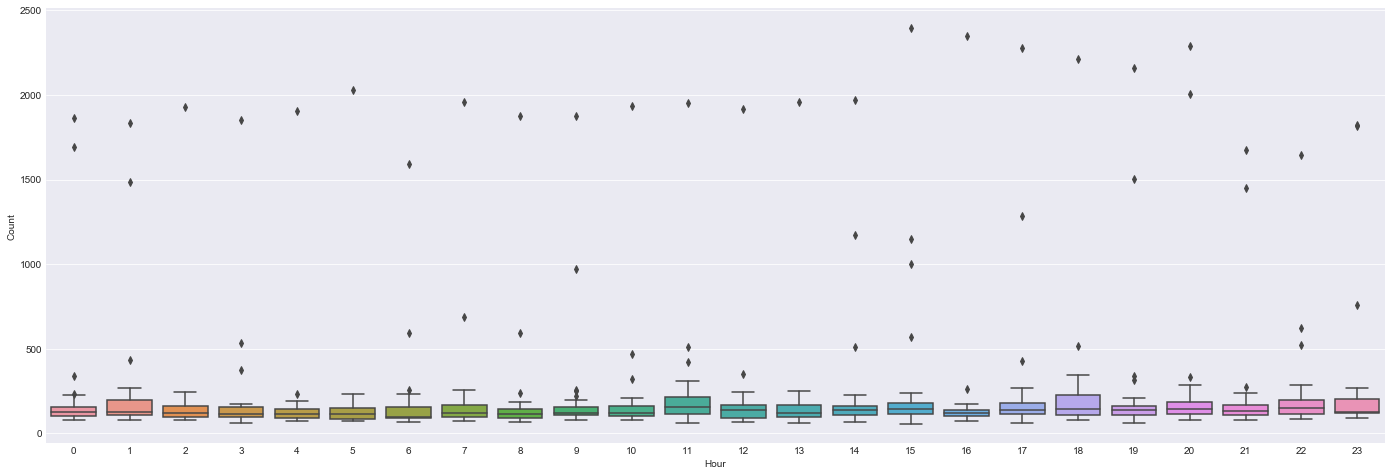

In [104]:
fig, ax = plt.subplots(figsize=(24, 8))
plt.suptitle('')
sns.boxplot(y = 'Count', x = 'Hour', data = final_time_array)

## Removing outliers for better clarity. Just seeing the values till 500 count as most of the value is till there.

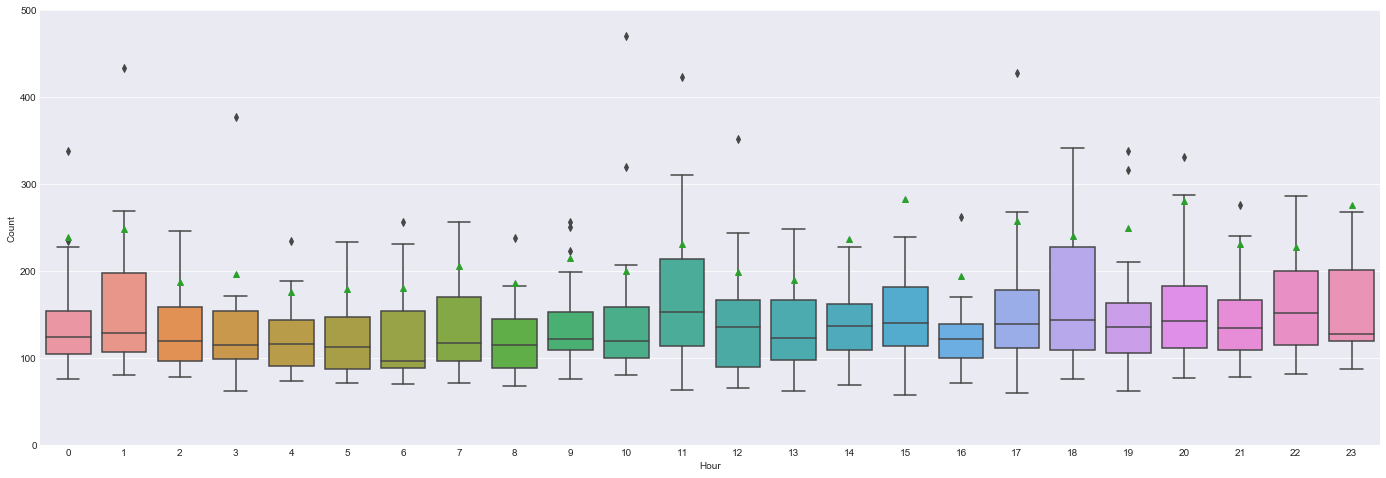

In [109]:
fig, ax = plt.subplots(figsize=(24, 8))
plt.suptitle('')
ax.set_ylim([0,500])
sns.boxplot(y = 'Count', x = 'Hour', data = final_time_array, showmeans = True)

## Distribution of attacks over the 31 days of January, 2018

In [179]:
attack_array = pd.DataFrame(columns = ['Day', 'Count'])

for i in range(0, len(data_set)):
    attack_array = pd.concat([attack_array, pd.DataFrame([{'Day': str(i + 1), 'Count' : data_set[i].shape[0]}])], ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


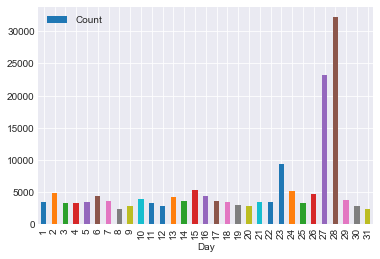

In [180]:
attack_array.plot(kind='bar', x = 'Day', y = 'Count')